# Imports

notes:

scipy==1.12
gensim==4.3.1
numpy==1.22


In [69]:
%pip install numpy==1.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
%pip install -r requirements.txt

  Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (112 kB)
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl (31.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 30.6 MB/s eta 0:00:00a 0:00:01
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl (38 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
Note: you may need to restart the kernel to use updated packages.


In [72]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 26.5 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install matplotlib
%pip install seaborn
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
#import kagglehub
import os
import shutil
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer

from gensim.models import Word2Vec

# Starting the actual code

Brain Dump:

1. download the data
2. word2vec
3. doc2vec 
4. explore the corpus and whats going on

this is the first pass

maybe pull multiple sets of data?



# EDA and Data Wrangling Dataset 1


In [49]:
%pip install kaggle

82849.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105839 sha256=99e439534550e4465fb05ef31235eebb2e66f41b0b4ea99608955926e0141cee
  Stored in directory: /Users/gracefujinaga/Library/Caches/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("goyaladi/twitter-dataset")

print("Path to dataset files:", path)

destination_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/twitter"
os.makedirs(destination_path, exist_ok=True)

# move downloaded files
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), destination_path)

print("Dataset moved to:", destination_path)

# EDA and Data Wrangling

In [2]:
# download the data
# Download latest version
path = kagglehub.dataset_download("subhajeetdas/hate-comment")

print("Path to dataset files:", path)

destination_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data"
os.makedirs(destination_path, exist_ok=True)

# move downloaded files
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), destination_path)

print("Dataset moved to:", destination_path)

Path to dataset files: /Users/gracefujinaga/.cache/kagglehub/datasets/subhajeetdas/hate-comment/versions/1
Dataset moved to: /Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data


In [17]:
data = pd.read_csv('/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/hate.csv')

In [18]:
data.drop(columns=['0'], inplace=True)


In [19]:
data

,comment,label
0,dalits are lowlives,N
1,gay people are a burden to our society,N
2,Arabs are not welcome,N
3,I'm not saying we should actually eliminate he...,N
4,bananas are for black people,N
...,...,...
41139,Indian culture is so backwards,N
41140,"Women don't want equality, they just want to b...",N
41141,fuck covid,P
41142,This computer is garbage,P


In [20]:
data['label'].value_counts()

label
N    22158
P    18950
O       36
Name: count, dtype: int64

/var/folders/zv/4f9cw9vs6tjbvz5bh2k07w_40000gn/T/ipykernel_54098/1781486811.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-Hate", "Hate", "Other"])


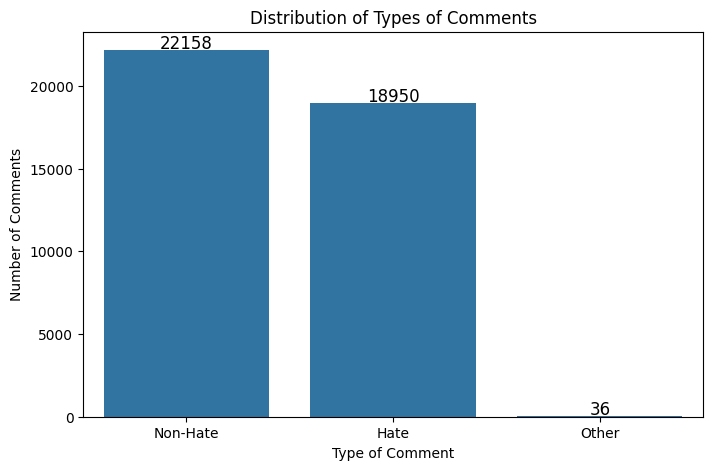

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data['label'].value_counts())

# Labels and title
plt.xlabel("Type of Comment")
plt.ylabel("Number of Comments")
plt.title("Distribution of Types of Comments")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Customize x-axis labels
ax.set_xticklabels(["Non-Hate", "Hate", "Other"])


# Show plot
plt.show()

In [36]:
def clean_comment(comment): 

    #split document into individual words
    tokens=comment.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]

    # # remove remaining tokens that are not alphabetic
    # tokens = [word for word in tokens if word.isalpha()]

    # # filter out short tokens
    # tokens = [word for word in tokens if len(word) > 4]

    #lowercase all words
    tokens = [word.lower() for word in tokens]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]    

    # word stemming    
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    
    return tokens


In [39]:
# Apply the clean_comment function to the 'comment' column
data['cleaned_comment'] = data['comment'].apply(clean_comment)

# Compute comment lengths after cleaning
data['comment_length'] = data['cleaned_comment'].apply(len)

# Get statistics
average_length = data['comment_length'].mean()
max_length = data['comment_length'].max()
min_length = data['comment_length'].min()

# Display results
print(f"Average Length: {average_length}")
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")


Average Length: 12.787064942640482
Max Length: 223
Min Length: 1


In [ ]:

# Compute comment lengths

data['comment_length'] = data['comment'].apply(len)

# Get statistics
average_length = data['comment_length'].mean()
max_length = data['comment_length'].max()
min_length = data['comment_length'].min()

# Display results
print(f"Average Length: {average_length}")
print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")


Average Length: 134.29642232160217
Max Length: 2374
Min Length: 4


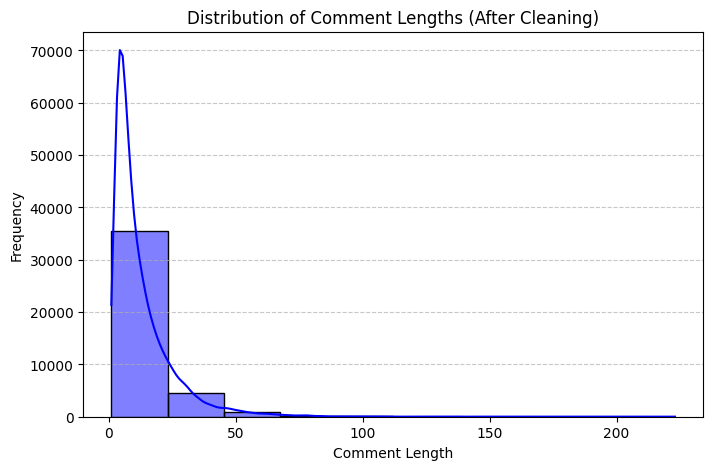

In [41]:


# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['comment_length'], bins=10, kde=True, color='blue')

# Labels and title
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Lengths (After Cleaning)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


# Words

In [ ]:
# first I need to concatenate all the strings into one corpus

### TODO: fix this


# Combine all comments into a single string and split into words
all_text = " ".join(data['comment'])  # Join all comments into one string
words = re.findall(r'\b\w+\b', all_text.lower())  # Extract words and convert to lowercase
words = [re_punc.sub('', w) for w in words]

print(len(words))

## remove stop words

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]

# Display result
print(len(filtered_words))


NameError: name 're_punc' is not defined

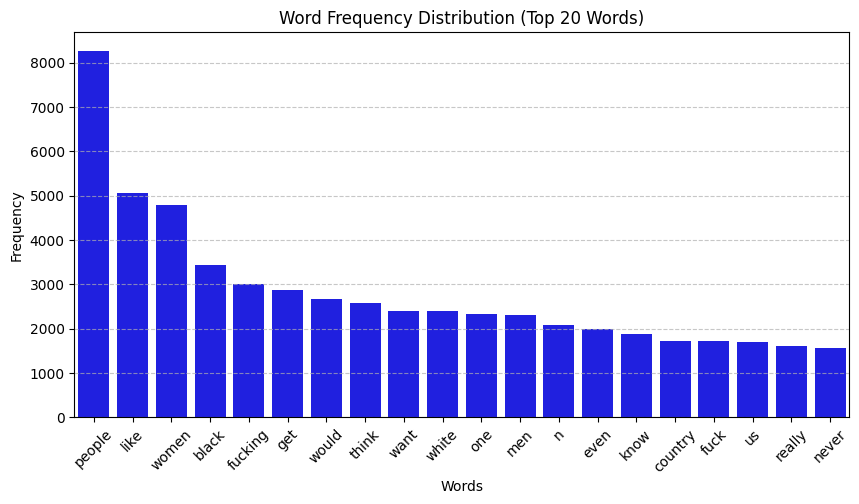

In [47]:
# figure out the word count

from collections import Counter


# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
word_freq_df = word_freq_df.iloc[:20]

# Plot histogram
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df['word'], y=word_freq_df['count'], color='blue')

# Labels and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Top 20 Words)")
plt.xticks(rotation=45)  # Rotate words for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()





## Handling word embeddings

Probably:
- make the max length 200 based on the histogram
- use word2vec
- TF-IDF
- work on seeing how elmo/other things work


In [ ]:
# lets crop each comment to 200 words

# then run some of the cleaning stuff on it --> then do that 

#### cluster

#### word emebeddings:
 - Word2Vec
 - GloVe
 - Elmo
 - Bert

In [ ]:
# cluster

# word emebeddings:
#

# Documents